In [2]:
import cshogi
import numpy as np
import cv2

In [3]:
board = cshogi.Board()

In [4]:
for move in board.legal_moves:
    print(cshogi.move_to_usi(move))

print(len(board.legal_moves))

1g1f
2g2f
3g3f
4g4f
5g5f
6g6f
7g7f
8g8f
9g9f
1i1h
9i9h
3i3h
3i4h
7i6h
7i7h
2h1h
2h3h
2h4h
2h5h
2h6h
2h7h
4i3h
4i4h
4i5h
6i5h
6i6h
6i7h
5i4h
5i5h
5i6h
30


In [5]:
board.push_usi("1g1f")

66309

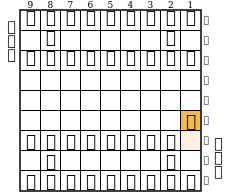

In [6]:
board

In [7]:
board.push_usi(cshogi.move_to_usi(list(board.legal_moves)[0]))

65795

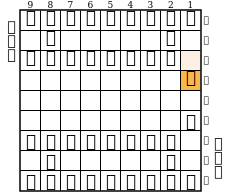

In [8]:
board

In [9]:
for i in range(2):
    board.pop()

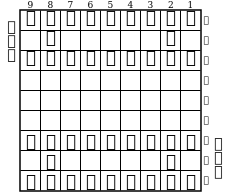

In [10]:
board

In [11]:
print(board.is_check())
print(board.is_game_over())
print(board.is_nyugyoku())
print(board.is_draw())

False
False
False
0


In [ ]:
board = cshogi.Board()

In [129]:
def random_play():
    board.reset()
    while True:
        if board.is_game_over():
            break
        move = np.random.choice(list(board.legal_moves))
        board.push(move)
    return 1-board.turn

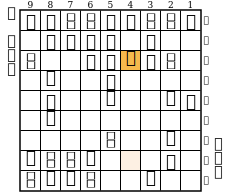

In [141]:
board

In [140]:
random_play()

1

In [142]:
play_num = 10000
results = np.array([random_play() for _ in range(play_num)])
print(results.mean())

0.493


In [86]:
len(board.history)

1447

In [36]:
FEAUTURES_NUM = len(cshogi.PIECE_TYPES) * 2 + len(cshogi.MAX_PIECES_IN_HAND) * 2

board_piece = np.zeros([FEAUTURES_NUM, 9, 9], dtype=np.float32)

In [37]:
board.piece_planes(board_piece)

In [38]:
print(cshogi.PIECE_TYPES)
print(cshogi.MAX_PIECES_IN_HAND)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[18, 4, 4, 4, 4, 2, 2]


In [40]:
np.array(board_piece).shape

(42, 9, 9)

In [42]:
print(np.unique(board.pieces))
print(np.unique(board.pieces_in_hand))

[ 0  1  2  4  5  6  7  8  9 10 11 12 13 22 23 24 25 26 27]
[0 1]


In [17]:
np.array(board.pieces).reshape(9, 9)

array([[ 9,  1,  0,  0,  0,  0,  0,  0, 25],
       [ 0,  1,  0, 12,  5,  0,  0, 25,  0],
       [ 9,  1,  0,  0,  0,  0,  2,  0, 23],
       [12, 13, 10,  0,  0,  0,  0,  0,  0],
       [ 9,  9,  9,  0,  0,  0,  1,  0, 25],
       [ 0, 11,  7, 10,  4,  0,  0, 23, 25],
       [11,  0, 12,  8, 27,  0,  0,  0, 22],
       [ 7,  0, 11,  1,  0, 24,  0,  0, 25],
       [ 9,  1,  6,  0,  0,  0,  0, 26,  0]])

In [17]:
svg_data = board.to_svg()

with open("shogi_board.svg", "w") as file:
    file.write(svg_data)

In [46]:
PIECE_VALUES = np.array([
    0,  # NONE
    100,  # BPAWN
    200,  # BLANCE
    200,  # BKNIGHT
    300,  # BSILVER
    1000,  # BBISHOP
    1000,  # BROOK
    300,  # BGOLD
    0,  # BKING
    500,  # BPROM_PAWN
    400,  # BPROM_LANCE
    400,  # BPROM_KNIGHT
    300,  # BPROM_SILVER,
    2000,  # BPROM_BISHOP
    2000,  # BPROM_ROOK
    None,  # NOTUSE
    None,  # NOTUSE
    -100,  # WPAWN
    -200,  # WLANCE
    -200,  # WKNIGHT
    -300,  # WSILVER
    -1000,  # WBISHOP
    -1000,  # WROOK
    -300,  # WGOLD
    0,  # WKING
    -500,  # WPROM_PAWN
    -400,  # WPROM_LANCE
    -400,  # WPROM_KNIGHT
    -300,  # WPROM_SILVER,
    -2000,  # WPROM_BISHOP
    -2000,  # WPROM_ROOK
])

HAND_PIECE_VALUES = np.array([
    100,  # HPAWN
    200,  # HLANCE
    200,  # HKNIGHT
    300,  # HSILVER
    300,  # HGOLD
    1000,  # HBISHOP
    1000,  # HROOK
])

In [56]:
indices = np.array([[0,1,2,5],[2,8,18,5]])
indices = indices.flatten()
sum(PIECE_VALUES[indices])

2300

In [52]:
len(PIECE_VALUES)

31

In [143]:
board.pieces_in_hand

([1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0])

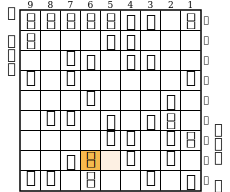

In [144]:
board